In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:
train_dataset = pd.read_csv('./data/train.csv')

In [130]:
train_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [131]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [132]:
train_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_dataset['Loan_Status'] = le.fit_transform(train_dataset['Loan_Status'])

In [136]:
y = train_dataset.iloc[:,-1].values

In [39]:
test_dataset = pd.read_csv("./data/test.csv")

In [40]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [41]:
test_dataset.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [88]:
dataset = pd.concat([train_dataset,test_dataset],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [89]:
dataset

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,1.0,3+,Not Graduate,Male,113.0,360.0,LP002971,NaN,Yes,Urban,Yes
363,4158,709.0,1.0,0,Graduate,Male,115.0,360.0,LP002975,NaN,Yes,Urban,No
364,3250,1993.0,NaN,0,Graduate,Male,126.0,360.0,LP002980,NaN,No,Semiurban,No
365,5000,2393.0,1.0,0,Graduate,Male,158.0,360.0,LP002986,NaN,Yes,Rural,No


In [90]:
dataset.drop(['Loan_Status','Loan_ID'],axis=1,inplace=True)

In [91]:
dataset.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
Credit_History       79
Dependents           25
Education             0
Gender               24
LoanAmount           27
Loan_Amount_Term     20
Married               3
Property_Area         0
Self_Employed        55
dtype: int64

In [92]:
dataset['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [93]:
dataset['Credit_History'] = dataset['Credit_History'].fillna(1)

In [94]:
dataset['Dependents'] = dataset['Dependents'].fillna(0)

In [139]:
dataset['Dependents'].value_counts()

0    570
2    160
1    160
3     91
Name: Dependents, dtype: int64

In [96]:
dataset['Gender'] = dataset['Gender'].fillna('Male')

In [97]:
dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean())

In [98]:
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean())

In [99]:
dataset['Self_Employed'] = dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0])

In [100]:
dataset['Married'] = dataset['Married'].fillna(dataset['Married'].mode()[0])

In [101]:
dataset.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education            0
Gender               0
LoanAmount           0
Loan_Amount_Term     0
Married              0
Property_Area        0
Self_Employed        0
dtype: int64

In [102]:
def convertToint(data):
    data = str(data)
    if '+' in data:
        data = list(data.split('+'))
        return int(data[0])
    else:
        return int(data)

In [103]:
dataset['Dependents'] = dataset['Dependents'].apply(convertToint)

In [104]:
dataset['Dependents']

0      0
1      1
2      0
3      0
4      0
      ..
362    3
363    0
364    0
365    0
366    0
Name: Dependents, Length: 981, dtype: int64

In [105]:
totalColumns = dataset.columns
num_list = dataset._get_numeric_data().columns
cat_col = []

In [106]:
for col in totalColumns:
    if col not in num_list:
        cat_col.append(col)

In [107]:
cat_col

['Education', 'Gender', 'Married', 'Property_Area', 'Self_Employed']

In [108]:
def category_onehot_multcols(multcolumns,combined_df):
    df_final=combined_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(combined_df[fields],drop_first=True)
        
        combined_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([combined_df,df_final],axis=1)
        
    return df_final

In [109]:
dataset = category_onehot_multcols(cat_col,dataset)

Education
Gender
Married
Property_Area
Self_Employed


In [110]:
dataset

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,LoanAmount,Loan_Amount_Term,Not Graduate,Male,Yes,Semiurban,Urban,Yes
0,5849,0.0,1.0,0,142.51153,360.0,0,1,0,0,1,0
1,4583,1508.0,1.0,1,128.00000,360.0,0,1,1,0,0,0
2,3000,0.0,1.0,0,66.00000,360.0,0,1,1,0,1,1
3,2583,2358.0,1.0,0,120.00000,360.0,1,1,1,0,1,0
4,6000,0.0,1.0,0,141.00000,360.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,1.0,3,113.00000,360.0,1,1,1,0,1,1
363,4158,709.0,1.0,0,115.00000,360.0,0,1,1,0,1,0
364,3250,1993.0,1.0,0,126.00000,360.0,0,1,0,1,0,0
365,5000,2393.0,1.0,0,158.00000,360.0,0,1,1,0,0,0


In [117]:
X_train = dataset.iloc[:614,:].values
X_test = dataset.iloc[614:,:].values

In [118]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [120]:
X_train

array([[ 0.07299082, -0.55448733,  0.41173269, ..., -0.7820157 ,
         1.42814704, -0.39260074],
       [-0.13441195, -0.03873155,  0.41173269, ..., -0.7820157 ,
        -0.70020801, -0.39260074],
       [-0.39374734, -0.55448733,  0.41173269, ..., -0.7820157 ,
         1.42814704,  2.54711697],
       ...,
       [ 0.43717437, -0.47240418,  0.41173269, ..., -0.7820157 ,
         1.42814704, -0.39260074],
       [ 0.35706382, -0.55448733,  0.41173269, ..., -0.7820157 ,
         1.42814704, -0.39260074],
       [-0.13441195, -0.55448733, -2.42876026, ...,  1.2787467 ,
        -0.70020801,  2.54711697]])

In [137]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
k_range = list(range(1,25))
model_acc = {}
for k in  k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y)
    model_acc[k] = accuracy_score(y,knn.predict(X_train))           

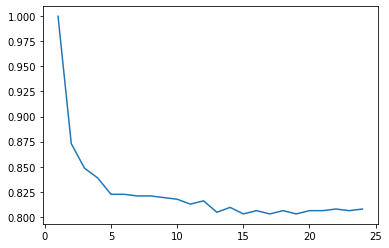

{1: 1.0, 2: 0.8729641693811075, 3: 0.8485342019543974, 4: 0.8387622149837134, 5: 0.8224755700325733, 6: 0.8224755700325733, 7: 0.8208469055374593, 8: 0.8208469055374593, 9: 0.8192182410423453, 10: 0.8175895765472313, 11: 0.8127035830618893, 12: 0.8159609120521173, 13: 0.8045602605863192, 14: 0.8094462540716613, 15: 0.8029315960912052, 16: 0.8061889250814332, 17: 0.8029315960912052, 18: 0.8061889250814332, 19: 0.8029315960912052, 20: 0.8061889250814332, 21: 0.8061889250814332, 22: 0.8078175895765473, 23: 0.8061889250814332, 24: 0.8078175895765473}


In [159]:
plt.plot(k_range,list(model_acc.values()))
plt.show()
print(model_acc)

In [160]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [146]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','poly','sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.688, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.688, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.686, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.771, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.746, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.735, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0

[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.688, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.688, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.686, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.688, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.688, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.686, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly ..................................
[CV] ...... C=1, gamma=0.0001, kernel=poly, score=0.688, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly ..................................
[CV] .

[CV] ......... C=100, gamma=1, kernel=poly, score=0.610, total=   0.8s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.637, total=   0.3s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.698, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.722, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.667, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.737, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.737, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.737, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.760, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV] ..... C=1000, gamma=0.01, kernel=poly, score=0.761, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV] ..... C=1000, gamma=0.01, kernel=poly, score=0.785, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV] ..... C=1000, gamma=0.01, kernel=poly, score=0.814, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV] .. C=1000, gamma=0.01, kernel=sigmoid, score=0.732, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV] .. C=1000, gamma=0.01, kernel=sigmoid, score=0.693, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    4.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [148]:
print(grid.best_params_) 
print(grid.best_estimator_)
print(grid.best_score_)

{'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8110749185667753


In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
Grid = GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
Grid.fit(X_train,y)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [151]:
print(Grid.best_score_)

0.8094462540716613


In [161]:
y_pred = knn.predict(X_test)

In [162]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [166]:
result = pd.DataFrame({'Loan_ID': test_dataset['Loan_ID'], 'Loan_Status': y_pred})


In [168]:
result['Loan_Status'] = result['Loan_Status'].map({0:'N', 1:'Y'})

In [169]:
result.to_csv('submit.csv',)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
